In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

#2. Load a dataset

In [5]:
ss=pd.read_csv("/content/abalone.csv")

In [6]:
ss.head(6)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


#3. Perform below visualizations

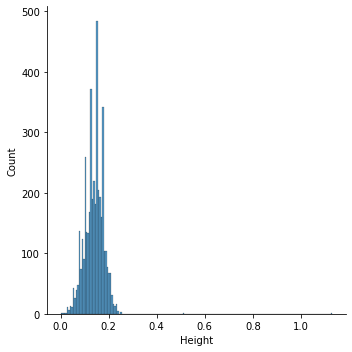

In [7]:
sns.displot(ss['Height'])

#Bi-variate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


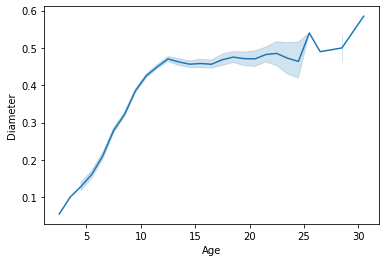

In [8]:
sns.lineplot(ss['Age'],ss['Diameter'])

#Multi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


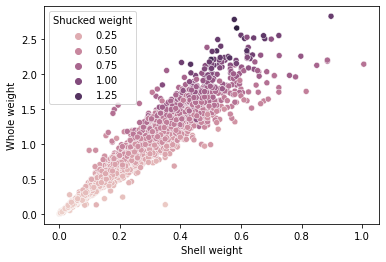

In [9]:
sns.scatterplot(ss['Shell weight'],ss['Whole weight'],ss['Shucked weight'])

#4. Perform descriptive statistics on the dataset.

In [10]:
ss.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Rings              9.933684
Age               11.433684
dtype: float64

In [11]:
ss.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Rings              9.0000
Age               10.5000
dtype: float64

In [12]:
ss.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ss.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


#5. Check for Missing values and deal with them.

In [15]:
ss.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Age               False
dtype: bool

#6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


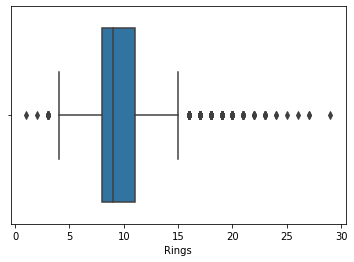

In [17]:
sns.boxplot(ss['Rings'])

In [20]:
v=ss.quantile([0.90,0.18])
v

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0.90,0.660,0.522,0.185,1.47820,0.6470,0.3260,0.42,14.0,15.5
0.18,0.415,0.315,0.100,0.33118,0.1425,0.0695,0.10,7.0,8.5


In [22]:
iqr=v.iloc[0]-v.iloc[1]
iqr

Length            0.24500
Diameter          0.20700
Height            0.08500
Whole weight      1.14702
Shucked weight    0.50450
Viscera weight    0.25650
Shell weight      0.32000
Rings             7.00000
Age               7.00000
dtype: float64

In [23]:
upper=v.iloc[0]+(1.5*iqr)
upper

Length             1.02750
Diameter           0.83250
Height             0.31250
Whole weight       3.19873
Shucked weight     1.40375
Viscera weight     0.71075
Shell weight       0.90000
Rings             24.50000
Age               26.00000
dtype: float64

In [24]:
lower=v.iloc[1]-(1.5*iqr)
lower

Length            0.04750
Diameter          0.00450
Height           -0.02750
Whole weight     -1.38935
Shucked weight   -0.61425
Viscera weight   -0.31525
Shell weight     -0.38000
Rings            -3.50000
Age              -2.00000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


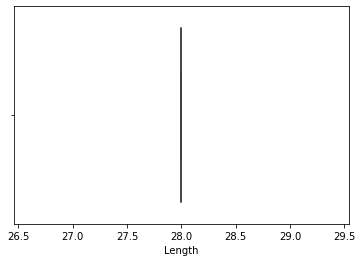

In [27]:
ss['Length']=np.where(ss['Length']<55,28,ss['Length'])
sns.boxplot(ss['Length'])

#7. Check for Categorical columns and perform encoding.

In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L=LabelEncoder()
O=OneHotEncoder()
ss['Sex']=L.fit_transform(ss['Sex'])
ss.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,28.0,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,28.0,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,28.0,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,28.0,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,28.0,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,1,28.0,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,0,28.0,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,0,28.0,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,2,28.0,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,0,28.0,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


#8. Split the data into dependent and independent variables.

In [34]:
x=ss.iloc[:,0:8]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,28.0,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,28.0,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,28.0,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,28.0,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,28.0,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,28.0,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,28.0,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,28.0,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,28.0,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [35]:
y=ss.iloc[:,8:9]
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


#9. Scale the independent variables

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
xscaled=sc.fit_transform(x)
xscaled


array([[ 1.15198011,  0.        , -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011,  0.        , -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.        ,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.        ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.        ,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  0.        ,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

#10. Split the data into training and testing


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=1)
x_train

array([[-1.28068972,  0.        ,  0.12213032, ..., -0.13232391,
         0.56939553, -0.20713907],
       [-0.0643548 ,  0.        ,  0.22290834, ..., -0.08951885,
        -0.41143379, -0.21073138],
       [-0.0643548 ,  0.        ,  0.27329735, ...,  0.17181731,
        -0.20614393,  0.1161693 ],
       ...,
       [-0.0643548 ,  0.        , -1.69187405, ..., -1.30383082,
        -1.4059491 , -1.41056465],
       [-1.28068972,  0.        ,  0.0213523 , ...,  0.25517453,
        -0.16052397, -0.42267798],
       [-0.0643548 ,  0.        , -1.84304108, ..., -1.40070543,
        -1.35576714, -1.42852623]])

# 11. Build the Model

#12. Train the Model

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#13. Test the Model

In [40]:
p=lr.predict(x_test)
p

array([[8.49941575],
       [7.07873876],
       [7.8347664 ],
       ...,
       [8.63585926],
       [8.70446541],
       [5.91871695]])

#Evaluation

In [41]:
y_test

,Rings
17,10
1131,8
299,9
1338,10
2383,16
...,...
802,9
3016,7
2886,8
2580,8
